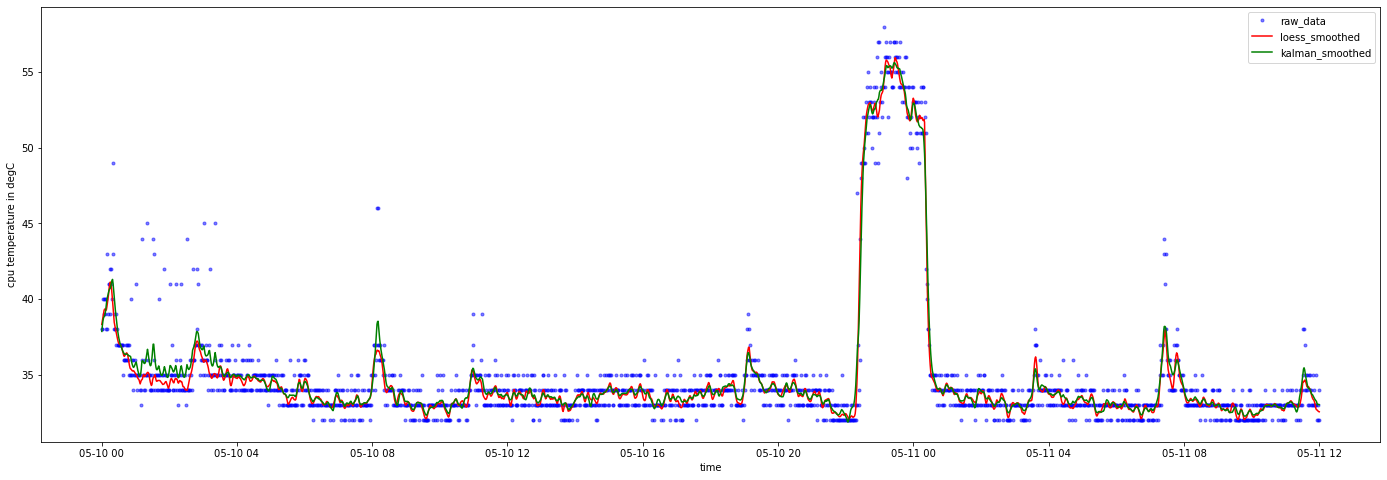

In [7]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from pykalman import KalmanFilter
lowess = sm.nonparametric.lowess


cpu_data = pd.read_csv("sysinfo.csv", parse_dates=['timestamp'])
plt.figure(figsize=(24, 8))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)

#LOESS Smoothing
loess_smoothed = lowess(cpu_data['temperature'], cpu_data['timestamp'], frac=0.005)
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-')

#Kalman Smoothing
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]
kf = KalmanFilter(
    initial_state_mean = kalman_data.iloc[0],
    observation_covariance = np.diag([0.8, 0.4, 0.4]) ** 2, # TODO: shouldn't be zero
    transition_covariance = np.diag([0.1, 0.1, 0.1]) ** 2, # TODO: shouldn't be zero
    transition_matrices = [[1, -1, 0.7], [0, 0.6, 0.03], [0, 1.3, 0.8]] # TODO
)
kalman_smoothed, _ = kf.smooth(kalman_data)
#plt.figure(2, figsize=(12, 4))
#plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-')
plt.legend(['raw_data', 'loess_smoothed', 'kalman_smoothed'])
plt.xlabel('time')
plt.ylabel('cpu temperature in degC')
# plt.savefig('cpu.svg')
plt.show()


In [5]:
kalman_data

,temperature,cpu_percent,sys_load_1
0,38,0.0819,0.67
1,38,0.0746,0.59
2,40,0.0564,0.60
3,40,0.0925,0.61
4,39,0.0794,0.46
...,...,...,...
2155,32,0.0125,0.07
2156,32,0.0125,0.09
2157,33,0.0136,0.09
2158,34,0.0150,0.08
